# Project OverView
Objective : To predict sales for given budget spend on TV, Radio and Newspaper in dollars.
Regression Problem
Data cleaning and Data preprocessing
Exploratory Data Analysis
Multiple Linear Regression model training and prediction

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

Here we have 200 rows and 4 columns

In [4]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

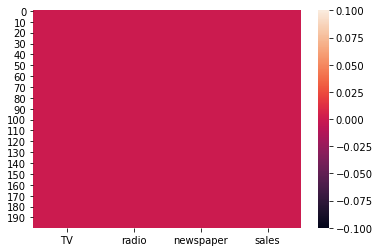

In [7]:
sns.heatmap(df.isnull())

No null values are in data set

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


As per the above description, skewness and outliers are there, we will visualize in further steps

In [9]:
df["sales"].value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

# Uni-variate Analysis

<AxesSubplot:xlabel='sales', ylabel='count'>

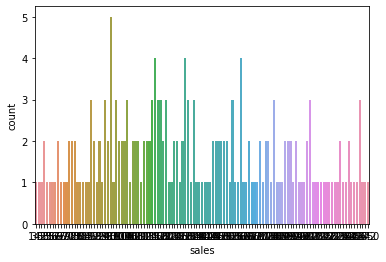

In [10]:
sns.countplot(x="sales",data=df)

<AxesSubplot:>

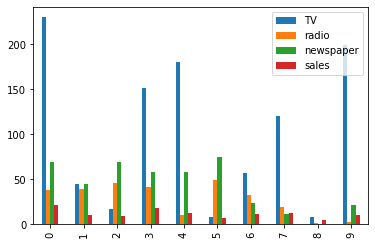

In [11]:
df[:10].plot.bar()

# Bi-variate Analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

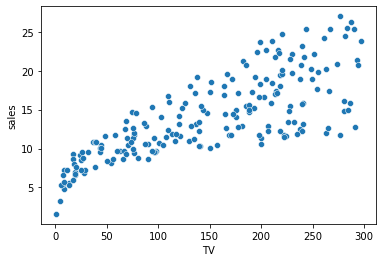

In [12]:
sns.scatterplot(x="TV",y="sales",data=df)

Above visualization shows that,as the advertising dollars spent on TV sales also increasing

<AxesSubplot:xlabel='radio', ylabel='sales'>

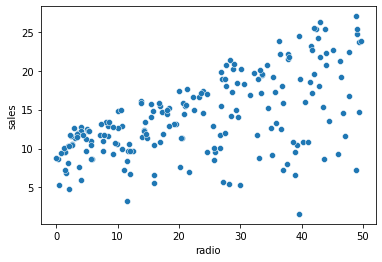

In [13]:
sns.scatterplot(x="radio",y="sales",data=df)

Above visualization shows that,as the advertising dollars spent on Radio sales also increasing

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

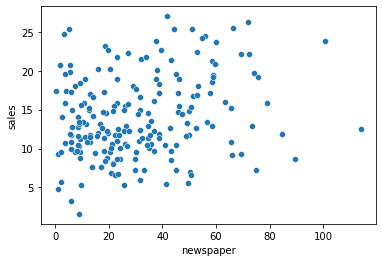

In [14]:
sns.scatterplot(x="newspaper",y="sales",data=df)

Above visualization shows that,newspaper is inversely proportional to Advertising.

# Multi-Variate Analysis

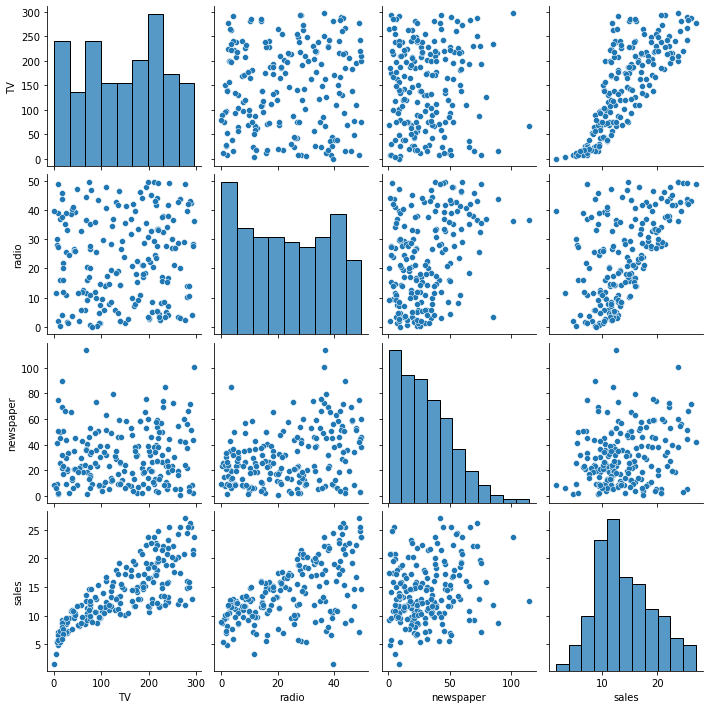

In [15]:
sns.pairplot(df, size=2.5)
plt.show()

Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.
There is no correlation seems between all features.

# Checking correlation

In [16]:
cor=df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


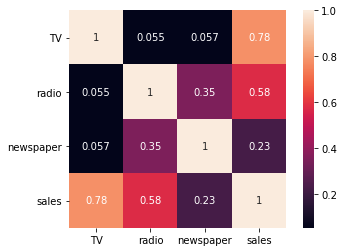

In [17]:
sns.heatmap(cor,annot=True,square=True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

# Checking Outliers

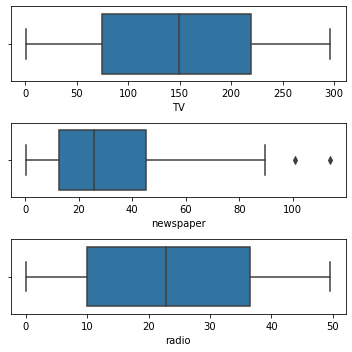

In [18]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

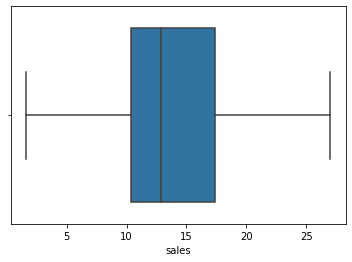

In [19]:
sns.boxplot(df['sales'])
plt.show()

In [20]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

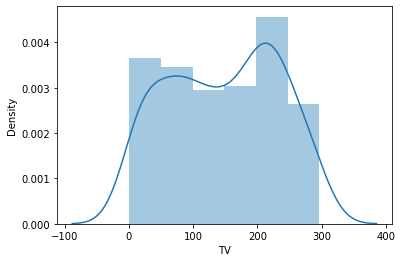

In [21]:
sns.distplot(df["TV"])
plt.show()

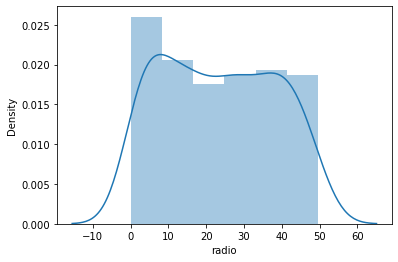

In [22]:
sns.distplot(df["radio"])
plt.show()

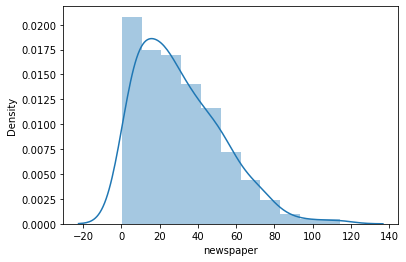

In [23]:
sns.distplot(df["newspaper"])
plt.show()

In [24]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

# Data Cleansing

In [26]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing Outliers using IQR method
df_new=df[~((df < (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]

In [27]:
df_new.shape

(198, 4)

In [28]:
loss_percentage=(200-198)/200*100
print(loss_percentage)

1.0


In [29]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

# Finding The Best Random State

In [30]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
maxAucc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    le=LinearRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.9333210789548928 on random_state 69


# Creating Train Test Split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=69)

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))
print(y_test)
print(pred)

0.9206663153239978
156    15.3
70     18.3
178    11.8
47     23.2
86     12.0
       ... 
46     10.6
110    13.4
150    16.1
180    10.5
122    11.6
Name: sales, Length: 66, dtype: float64
[15.1550041  17.7325615  16.28900075 21.51783233 11.42342313 15.5263965
  9.16797826  7.81547361 14.17660472 21.64355702 11.38388908 16.89881302
  7.38642736 15.29949641 16.63322037  3.73863192  8.86085954 20.62414464
 18.90247654 20.94580034 14.92168565  7.47723006 12.42647367 24.04714815
 18.05152532 19.1563385  18.41401531 13.56296833 23.40424817 14.83157387
 18.01201259 11.5057192  19.34925095 10.06020139 23.15124604 12.7378757
 14.95788975 11.66926532 12.10155276 20.59012823 17.73369914  9.60139078
  7.11925466  3.70062427 16.74584817  5.22438687 14.13141777 20.50721861
  6.69077514 18.1480377  16.65874157 18.17498732 20.13293477 10.10458077
 10.15120524 11.03183745 15.35437211 19.22333257 13.41407108  8.91400058
 15.33319502  8.96889245 15.04103028 18.56129569 10.72440138 13.83867888]


In [38]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(r2_score(y_test,pred))
print(y_test)
print(pred)

0.9845882895320793
156    15.3
70     18.3
178    11.8
47     23.2
86     12.0
       ... 
46     10.6
110    13.4
150    16.1
180    10.5
122    11.6
Name: sales, Length: 66, dtype: float64
[13.971 18.135 11.698 23.165 12.38  15.669 10.07   9.507 11.996 23.439
 12.575 15.378  9.333 13.044 15.394  5.639 10.13  22.612 19.769 20.335
 12.145  6.941 13.268 25.273 18.65  19.834 18.914 11.312 22.574 16.09
 19.054 11.042 21.13  11.273 25.293 13.477 12.234 10.506 10.929 22.676
 17.88  10.079  9.142  5.971 17.314  4.973 12.373 22.404  9.118 19.424
 15.313 18.898 20.144  8.915  6.783 12.501 15.189 20.035 13.862 10.578
 15.225 10.153 12.427 15.138 10.929 11.322]


In [42]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print(r2_score(y_test,pred))
print(y_test)
print(pred)

0.7960685096970597
156    15.3
70     18.3
178    11.8
47     23.2
86     12.0
       ... 
46     10.6
110    13.4
150    16.1
180    10.5
122    11.6
Name: sales, Length: 66, dtype: float64
[14.05441272 17.61583658 16.19383086 18.87536863 11.19826486 15.78085069
 10.75294489 10.53134509 15.95885794 19.56409361 12.79988261 16.88423492
  8.72345049 15.45354503 16.72772905  6.95349733 10.64489679 19.29903413
 17.40033303 19.01189768 16.07549855  7.77505395 13.69847284 19.55481756
 17.49114444 18.79832204 18.43001176 10.77692508 18.78460856 14.66132762
 16.90255285 10.50765984 17.1696414  12.31949335 18.64592943 13.51822562
 15.72618128 10.04881664 10.30184599 19.00295714 16.97700118  9.19438757
  9.23094425  6.83516072 16.26015439  7.07200233 15.25535473 19.1125525
  9.30748284 18.21070568 15.40946188 16.47734877 17.77421188  8.73634946
  8.32373605 12.05352143 16.78886636 18.60896827 15.47828235 11.29846354
 15.69225754 10.91466466 16.58508518 17.48865914 12.46182851 14.84834518]


In [44]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print(r2_score(y_test,pred))
print(y_test)
print(pred)

0.9656454142870302
156    15.3
70     18.3
178    11.8
47     23.2
86     12.0
       ... 
46     10.6
110    13.4
150    16.1
180    10.5
122    11.6
Name: sales, Length: 66, dtype: float64
[13.8047619  18.80952381 12.42941176 22.62352941 12.672      16.07647059
 10.72142857 10.57857143 12.42941176 23.18039216 12.84736842 15.28076923
 10.05       12.87272727 15.28076923  6.24285714 10.6        22.92222222
 19.15       19.96666667 12.45        7.23846154 14.46285714 24.445
 18.23666667 19.5173913  19.04705882 11.26470588 21.46969697 16.07647059
 19.04705882 11.26470588 21.42631579 11.2375     24.41875    14.46285714
 12.42941176 10.10810811 10.6        22.69069767 17.16666667 10.25
 10.10810811  6.70769231 17.13939394  5.7        12.71875    22.66875
 10.24       19.5173913  15.095      18.21363636 19.5173913   8.5875
  6.74285714 12.672      15.61578947 19.5173913  14.74117647 10.65384615
 15.91875    10.6        12.84       15.12666667 11.75       12.21176471]


In [45]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(r2_score(y_test,pred))
print(y_test)
print(pred)

0.8941978943452356
156    15.3
70     18.3
178    11.8
47     23.2
86     12.0
       ... 
46     10.6
110    13.4
150    16.1
180    10.5
122    11.6
Name: sales, Length: 66, dtype: float64
[14.24 17.58 13.46 20.94 11.04 14.9  10.82 10.64 15.12 21.1  12.12 17.16
  8.84 14.04 15.34  6.24 10.02 19.62 19.32 24.34 14.64  6.76 12.12 24.9
 15.56 19.6  20.14 10.16 23.94 14.54 17.9  11.38 18.02 11.5  19.3  12.92
 14.08  8.24 10.3  21.1  16.98 10.28  9.5   6.66 16.98  5.18 12.6  21.1
  9.52 18.62 15.32 15.92 21.08  9.02  6.64 12.12 19.1  18.5  14.48 11.02
 15.48 10.86 15.14 15.7  11.62 13.  ]


In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation Score of Logistic Regression",scr.mean()) 

Cross validation Score of Logistic Regression 0.8871063495438436


In [48]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation Score of Random Forest Classifier",scr.mean())

Cross validation Score of Random Forest Classifier 0.9734910719218174


In [49]:
scr=cross_val_score(svr,x,y,cv=5)
print("Cross validation Score of Support Vector Classifier",scr.mean())

Cross validation Score of Support Vector Classifier 0.8404415171122854


In [50]:
scr=cross_val_score(ad,x,y,cv=5)
print("Cross validation Score of AdaBoost Classifier",scr.mean()),

Cross validation Score of AdaBoost Classifier 0.9540139672041358


In [51]:
scr=cross_val_score(kn,x,y,cv=5)
print("Cross validation Score of Kneighbors Classifier",scr.mean()),1

Cross validation Score of Kneighbors Classifier 0.9085710686189529


# Hyper parameter_tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [65]:
#creating parameter list to pass in GridSearchCV

parameters={"n_estimators":(2,4,6,8,10,12),
           "criterion":["mse","mae"]}

In [66]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5) #tuning RandomForestRegressor

In [67]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'n_estimators': (2, 4, 6, 8, 10, 12)})

In [68]:
GCV.best_params_

{'criterion': 'mae', 'n_estimators': 12}

In [70]:
rf_mod=RandomForestRegressor(criterion="mae",n_estimators=12)

rf_mod.fit(x_train,y_train)
pred=rf_mod.predict(x_test)
print(r2_score(y_test,pred)*100)

98.28755906000033


In [71]:
#creating parameter list to pass in GridSearchCV

parameters={"n_estimators":(2,4,6,8,10,12),
           "loss":["linear","square","exponential"]}

In [72]:
GCV=GridSearchCV(AdaBoostRegressor(),parameters,cv=5) #tuning AdaboostRegressor

In [73]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': (2, 4, 6, 8, 10, 12)})

In [74]:
GCV.best_params_

{'loss': 'exponential', 'n_estimators': 10}

In [76]:
ad_mod=AdaBoostRegressor(loss="exponential",n_estimators=10)

ad_mod.fit(x_train,y_train)
pred=ad_mod.predict(x_test)
print(r2_score(y_test,pred)*100)

95.17768515977714


In [77]:
#creating parameter list to pass in GridSearchCV

parameters={"n_neighbors":(1,2,3,4,5,6,7,8,9),
           "algorithm":["auto","ball_tree","kd_tree","brute"]}

In [78]:
GCV=GridSearchCV(KNeighborsRegressor(),parameters,cv=5) #tuning KNeighbors

In [79]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9)})

In [80]:
GCV.best_params_

{'algorithm': 'auto', 'n_neighbors': 2}

In [81]:
kn_mod=KNeighborsRegressor(algorithm="auto",n_neighbors=2)

kn_mod.fit(x_train,y_train)
pred=kn_mod.predict(x_test)
print(r2_score(y_test,pred)*100)

88.65960799761957


# Saving The Model

In [84]:
import joblib
joblib.dump(rf_mod,"Advertising.pkl")

['Advertising.pkl']